In [1]:
pip install pyodbc pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyodbc
import pandas as pd

# Establish connection using Windows Authentication
conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=VSP_LENOVO;'  # Your server name from SSMS
    'DATABASE=master;'  # Change this after creating your database
    'Trusted_Connection=yes;'  # This enables Windows Authentication
)

# Test connection: List available databases
query = "SELECT name FROM sys.databases;"
df = pd.read_sql(query, conn)

# Show databases
print(df)

             name
0          master
1          tempdb
2           model
3            msdb
4  ecommerce_data
5     EcommerceDB


C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\2508350014.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [11]:
import pyodbc
import pandas as pd
import os

# SQL Server connection setup
server = 'VSP_LENOVO'
database = 'EcommerceDB'
conn = pyodbc.connect(f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;")
cursor = conn.cursor()

# Folder path where all your CSVs are saved
folder_path = r"C:\Users\vsp27\OneDrive\Desktop\Csv data\Ecommerce Data"

# CSV filenames mapped to SQL table names
csv_files = {
    "customers": "olist_customers_dataset.csv",
    "sellers": "olist_sellers_dataset.csv",
    "orders": "olist_orders_dataset.csv",
    "order_items": "olist_order_items_dataset.csv",
    "payments": "olist_order_payments_dataset.csv",
    "products": "olist_products_dataset.csv",
    "reviews": "olist_order_reviews_dataset.csv",
    "geolocation": "olist_geolocation_dataset.csv",
    "product_category_translation": "product_category_name_translation.csv"
}

# Define primary keys for deduplication (optional: skip if not needed)
primary_keys = {
    "customers": "customer_id",
    "sellers": "seller_id",
    "orders": "order_id",
    "order_items": "order_id",  # Composite key not handled here
    "payments": "order_id",
    "products": "product_id",
    "reviews": "review_id",
    "geolocation": "geolocation_zip_code_prefix",
    "product_category_translation": "product_category_name"
}

# Function to load CSVs into SQL
def load_csv_to_sql(table_name, csv_file, primary_key_column):
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)

    df = df.where(pd.notna(df), None)

# Drop duplicate rows based on primary key
    df.drop_duplicates(subset=primary_key_column, inplace=True)

    # Check for duplicate rows already in SQL
    try:
        existing_keys_query = f"SELECT {primary_key_column} FROM {table_name}"
        existing_keys_df = pd.read_sql(existing_keys_query, conn)

        if primary_key_column in df.columns:
            df = df[~df[primary_key_column].isin(existing_keys_df[primary_key_column])]
        else:
            print(f"⚠️ Column {primary_key_column} not found in CSV for {table_name}, skipping deduplication.")
    except Exception as e:
        print(f"⚠️ Couldn't fetch existing keys for {table_name}: {e}")

    if df.empty:
        print(f"✅ No new rows to insert for {table_name}")
        return

    # Prepare insert SQL
    columns = ", ".join(df.columns)
    placeholders = ", ".join(["?"] * len(df.columns))
    insert_sql = f"INSERT INTO {table_name} ({columns}) VALUES ({placeholders})"

    try:
        records = df.itertuples(index=False, name=None)
        cursor.executemany(insert_sql, list(records))
        conn.commit()
        print(f"✅ Inserted {len(df)} rows into {table_name}")
    except Exception as e:
        print(f"❌ Failed to insert into {table_name}: {e}")

# Run for all tables
for table, csv_file in csv_files.items():
    pk = primary_keys.get(table, None)
    load_csv_to_sql(table, csv_file, pk)


C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\1463780947.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  existing_keys_df = pd.read_sql(existing_keys_query, conn)
C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\1463780947.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  existing_keys_df = pd.read_sql(existing_keys_query, conn)


✅ No new rows to insert for customers
✅ No new rows to insert for sellers


C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\1463780947.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  existing_keys_df = pd.read_sql(existing_keys_query, conn)


✅ No new rows to insert for orders


C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\1463780947.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  existing_keys_df = pd.read_sql(existing_keys_query, conn)


✅ No new rows to insert for order_items


C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\1463780947.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  existing_keys_df = pd.read_sql(existing_keys_query, conn)
C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\1463780947.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  existing_keys_df = pd.read_sql(existing_keys_query, conn)


✅ No new rows to insert for payments
✅ No new rows to insert for products


C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\1463780947.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  existing_keys_df = pd.read_sql(existing_keys_query, conn)


✅ Inserted 98410 rows into reviews


C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\1463780947.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  existing_keys_df = pd.read_sql(existing_keys_query, conn)


✅ No new rows to insert for geolocation
✅ No new rows to insert for product_category_translation


C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\1463780947.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  existing_keys_df = pd.read_sql(existing_keys_query, conn)


In [13]:
query = """
SELECT 'customers' AS TableName, COUNT(*) AS TotalRows FROM customers
UNION ALL
SELECT 'sellers', COUNT(*) FROM sellers
UNION ALL
SELECT 'orders', COUNT(*) FROM orders
UNION ALL
SELECT 'order_items', COUNT(*) FROM order_items
UNION ALL
SELECT 'payments', COUNT(*) FROM payments
UNION ALL
SELECT 'products', COUNT(*) FROM products
UNION ALL
SELECT 'reviews', COUNT(*) FROM reviews
UNION ALL
SELECT 'geolocation', COUNT(*) FROM geolocation
UNION ALL
SELECT 'product_category_translation', COUNT(*) FROM product_category_translation;
"""

df = pd.read_sql_query(query, conn)
print(df)


                      TableName  TotalRows
0                     customers      99441
1                       sellers       3095
2                        orders      99441
3                   order_items     112650
4                      payments     103886
5                      products      32340
6                       reviews      98410
7                   geolocation    1000163
8  product_category_translation         71


C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\3113994166.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [15]:
query = """
SELECT TOP 5 
       c.customer_state,
       c.customer_city, 
       COUNT(o.order_id) AS total_orders,
       SUM(oi.price) AS total_revenue
FROM order_items oi
JOIN orders o ON oi.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
WHERE o.order_purchase_timestamp BETWEEN CAST('2016-01-01' AS DATETIME2) 
                                     AND CAST('2018-12-31' AS DATETIME2)
GROUP BY c.customer_state, c.customer_city
ORDER BY total_revenue DESC;
"""

df = pd.read_sql_query(query, conn)
print(df)

C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\3386121512.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


  customer_state   customer_city  total_orders  total_revenue
0             SP       sao paulo         17808     1914924.54
1             RJ  rio de janeiro          7837      992538.86
2             MG  belo horizonte          3144      355611.13
3             DF        brasilia          2392      301920.25
4             PR        curitiba          1751      211738.06


In [17]:
query = """
WITH customer_activity AS (
    SELECT 
        customer_id, 
        DATEFROMPARTS(YEAR(order_purchase_timestamp), MONTH(order_purchase_timestamp), 1) AS month
    FROM orders
    GROUP BY customer_id, DATEFROMPARTS(YEAR(order_purchase_timestamp), MONTH(order_purchase_timestamp), 1)
),
monthly_churn AS (
    SELECT 
        month,
        COUNT(DISTINCT customer_id) AS active_customers,
        LAG(COUNT(DISTINCT customer_id)) OVER (ORDER BY month) AS previous_month_customers
    FROM customer_activity
    GROUP BY month
)
SELECT 
    month, 
    active_customers,
    previous_month_customers,
    (previous_month_customers - active_customers) * 100.0 / NULLIF(previous_month_customers, 0) AS churn_rate
FROM monthly_churn
WHERE previous_month_customers IS NOT NULL;
"""

df = pd.read_sql_query(query, conn)
print(df)


         month  active_customers  previous_month_customers    churn_rate
0   2017-03-01              2682                      1780    -50.674157
1   2017-10-01              4631                      4285     -8.074679
2   2018-05-01              6873                      6939      0.951146
3   2017-04-01              2404                      2682     10.365399
4   2017-11-01              7544                      4631    -62.902181
5   2018-06-01              6167                      6873     10.272079
6   2017-05-01              3700                      2404    -53.910150
7   2017-12-01              5673                      7544     24.801166
8   2018-07-01              6292                      6167     -2.026917
9   2016-10-01               324                         4  -8000.000000
10  2017-06-01              3245                      3700     12.297297
11  2018-01-01              7269                      5673    -28.133263
12  2018-08-01              6512                   

C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\3100904607.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [19]:
query = """
SELECT 
    revenue.year,
    revenue.month_name,
    revenue.total_revenue,
    reviews.average_review_score,
    COALESCE(payments.total_payment, 0) AS total_payment,
    payments.payment_type

FROM 
    (SELECT 
        MONTH(oi.shipping_limit_date) AS month,
        YEAR(oi.shipping_limit_date) AS year,
        DATENAME(MONTH, oi.shipping_limit_date) AS month_name,  
        SUM(oi.price) AS total_revenue
    FROM order_items oi
    WHERE oi.shipping_limit_date BETWEEN '2016-01-01' AND '2018-12-31'
    GROUP BY YEAR(oi.shipping_limit_date), MONTH(oi.shipping_limit_date), DATENAME(MONTH, oi.shipping_limit_date)
    ) revenue

LEFT JOIN (
    SELECT 
        MONTH(oi.shipping_limit_date) AS month,
        AVG(r.review_score) AS average_review_score
    FROM order_items oi
    JOIN reviews r ON oi.order_id = r.order_id
    GROUP BY MONTH(oi.shipping_limit_date)
    ) reviews
ON revenue.month = reviews.month

LEFT JOIN (
    SELECT 
        MONTH(o.order_purchase_timestamp) AS month,
        YEAR(o.order_purchase_timestamp) AS year, 
        SUM(p.payment_value) AS total_payment,
        p.payment_type
    FROM payments p
    JOIN orders o ON p.order_id = o.order_id
    GROUP BY YEAR(o.order_purchase_timestamp), MONTH(o.order_purchase_timestamp), p.payment_type
    ) payments

ON revenue.year = payments.year AND revenue.month = payments.month
ORDER BY revenue.year, revenue.month;
"""

df = pd.read_sql_query(query, conn)
print(df)


C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\3412338657.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


    year month_name  total_revenue  average_review_score  total_payment  \
0   2016  September         194.47                     4         252.24   
1   2016    October       49580.55                     4         879.07   
2   2016    October       49580.55                     4        9679.06   
3   2016    October       49580.55                     4       48290.62   
4   2016    October       49580.55                     4         241.73   
..   ...        ...            ...                   ...            ...   
84  2018     August     1072147.70                     4       34969.20   
85  2018     August     1072147.70                     4           0.00   
86  2018     August     1072147.70                     4      143805.90   
87  2018  September       14502.50                     4        4439.54   
88  2018  September       14502.50                     4           0.00   

   payment_type  
0   credit_card  
1       voucher  
2        boleto  
3   credit_card  
4    debi

In [21]:
query = """
SELECT
    a.month AS month_no,
    DATENAME(MONTH, DATEFROMPARTS(2000, a.month, 1)) AS month_name,
    SUM(CASE WHEN a.year = 2016 THEN 1 ELSE 0 END) AS Year2016,
    SUM(CASE WHEN a.year = 2017 THEN 1 ELSE 0 END) AS Year2017,
    SUM(CASE WHEN a.year = 2018 THEN 1 ELSE 0 END) AS Year2018
FROM (
    SELECT 
        customer_id,
        order_id,
        order_delivered_customer_date,  
        order_status,
        YEAR(order_delivered_customer_date) AS year,
        MONTH(order_delivered_customer_date) AS month
    FROM orders
    WHERE order_status = 'delivered' AND order_delivered_customer_date IS NOT NULL
) a
GROUP BY a.month
ORDER BY month_no ASC;
"""

df = pd.read_sql_query(query, conn)
print(df)


    month_no month_name  Year2016  Year2017  Year2018
0          1    January         0       176      4119
1          2   February         0       846      3559
2          3      March         0      1493      4242
3          4      April         0      1147      4874
4          5        May         0      2307      4386
5          6       June         0      1983      4283
6          7       July         0      2227      3634
7          8     August         0      2652      5135
8          9  September         0      2452        35
9         10    October       126      2791         2
10        11   November        30      2907         0
11        12   December         2      4368         0


C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\1233207488.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


C:\Users\vsp27\AppData\Local\Temp\ipykernel_32168\2676943189.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


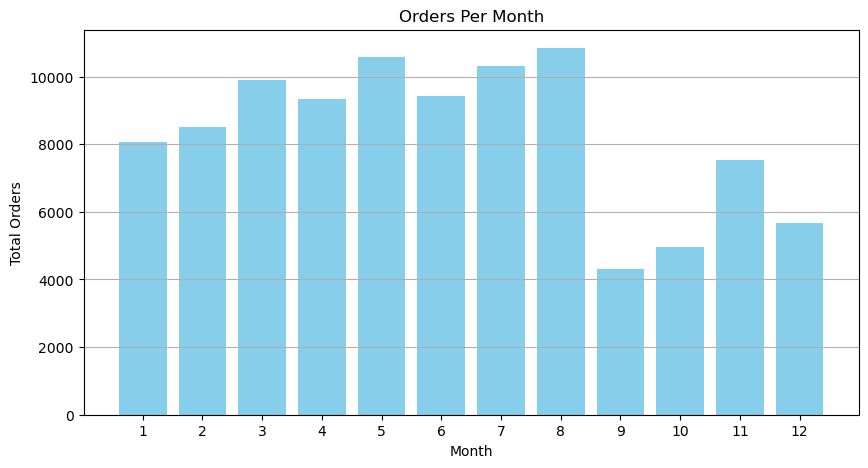

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as sa
from sqlalchemy import create_engine

query = """
SELECT 
    MONTH(order_purchase_timestamp) AS month_no,
    COUNT(order_id) AS total_orders
FROM orders
GROUP BY MONTH(order_purchase_timestamp)
ORDER BY month_no;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10,5))
plt.bar(df["month_no"], df["total_orders"], color='skyblue')
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.title("Orders Per Month")
plt.xticks(range(1,13))
plt.grid(axis='y')
plt.show()
